In [99]:
!pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io.wavfile import read 
from scipy.signal import upfirdn
from playsound import playsound
import IPython.display as ipd
from scipy.io.wavfile import write
from scipy.signal import butter
from scipy.signal import filtfilt
import soundfile as sf
from IPython.display import Audio



In [101]:
y, fs = sf.read('song.wav', dtype='float32')
display(Audio(y, rate=fs))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


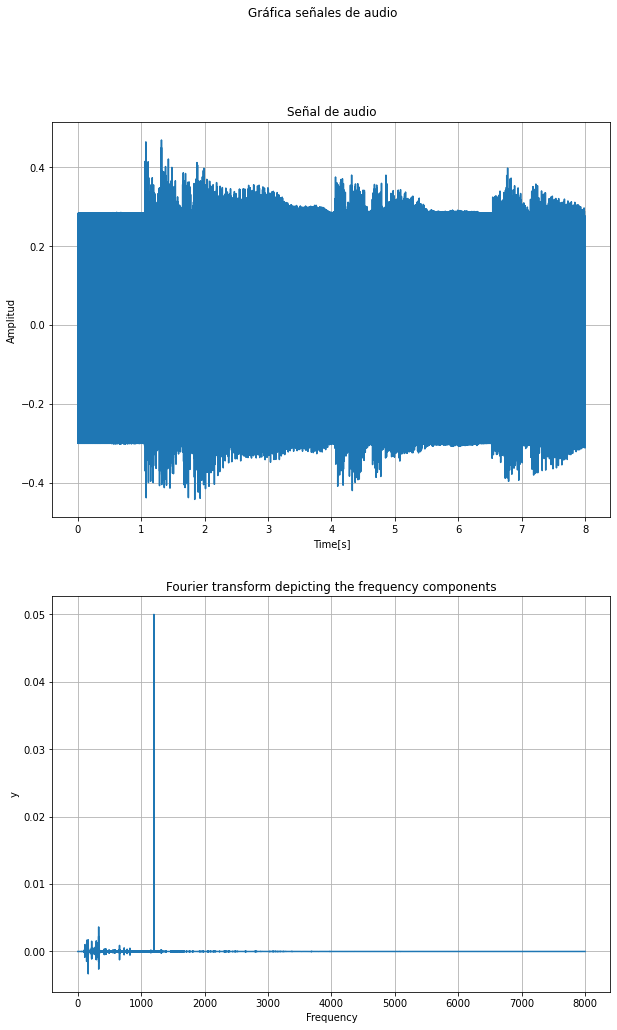

In [108]:
duration = len(y)/fs
time = np.arange(0,duration,1/fs) #time vector

fig, axs = plt.subplots(2)
fig.suptitle('Gráfica señales de audio')

axs[0].set_title("Señal de audio")
axs[0].set_xlabel("Time[s]")
axs[0].set_ylabel("Amplitud")
axs[0].plot(time, y)
axs[0].grid(True)


fourierTransform = np.fft.fft(y)/len(y)           # Normalize y
fourierTransform = fourierTransform[range(int(len(y)/2))] # Exclude sampling frequency


 
tpCount= len(y)
values= np.arange(int(tpCount/2))
timePeriod= tpCount/fs
frequencies= values/timePeriod

axs[1].set_title('Fourier transform depicting the frequency components')
axs[1].plot(frequencies, fourierTransform)
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('y')
axs[1].grid(True)


fig.set_size_inches(10, 16)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


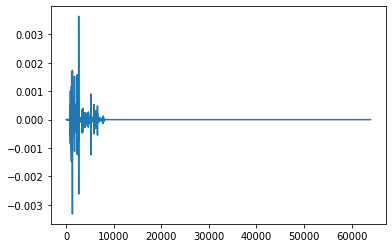

In [136]:
fourierTransform[8000:]=0

plt.plot(fourierTransform)


In [137]:
itx = np.fft.ifft(fourierTransform)

In [138]:
write("new.wav", fs, itx.astype(np.int16))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


In [145]:
display(Audio(itx, rate=fs/2))